### Experiment: Normalization

**Question**: Is normalization necessary? If so, what kind performs best?

**Hypothesis**: The data is already re-referenced using `mne.set_eeg_reference("average")` during pre-processing. The range used is approximately $[-55, 55]$, models might work better at a more commonly used range of $[0,1]$, or $[-1, 1]$ to keep negative numbers.

**Result**:

#### Part 1: Investigation

In [1]:
import xarray as xr
from xhistogram.xarray import histogram
import numpy as np
from pathlib import Path

In [6]:
data_path = Path("../data/sat1/split_stage_data.nc")
# data_path = Path("../data/ar/data.nc")
data = xr.load_dataset(data_path)

##### Histogram of distribution of all values

<xarray.DataArray 'histogram_data' (data_bin: 59)>
array([       2,        1,        0,        5,       15,       19,
             24,       32,       45,       61,      100,      158,
            253,      519,      867,     1583,     3230,     6714,
          15760,    38855,    97256,   250239,   634912,  1572221,
        3677891,  7561941, 11932895, 12228996,  8004789,  3907171,
        1684189,   701249,   298114,   131032,    58714,    27015,
          12419,     5919,     2804,     1380,      692,      298,
            154,       52,       25,       25,       18,       11,
              5,        3,        3,        2,        1,        3,
              3,        3,        0,        1,        2])
Coordinates:
  * data_bin  (data_bin) float64 -80.16 -77.14 -74.12 ... 88.9 91.92 94.94

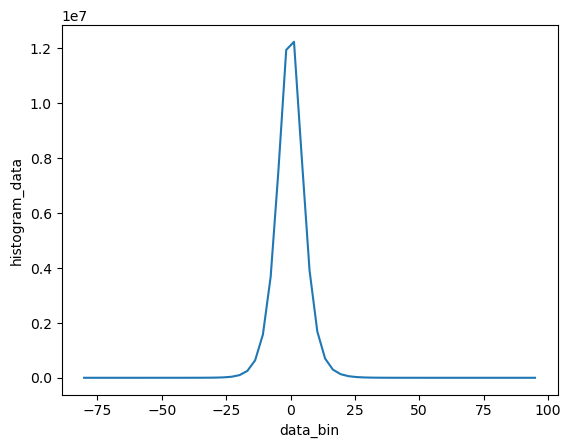

In [7]:
max = data.max().data.item()
min = data.min().data.item()
bins = np.linspace(min, max, 60)
hist = histogram(data.data, bins=bins, block_size=data.samples.size)
display(hist)
hist.plot()

##### Histogram of distribution for each channel

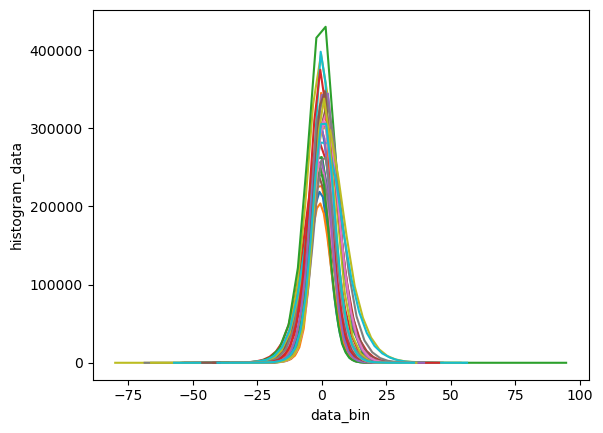

In [8]:
for channel in data.channels:
    data_subset = data.sel(channels=channel)
    max = data_subset.max().data.item()
    min = data_subset.min().data.item()
    bins = np.linspace(min, max, 40)
    hist = histogram(data_subset.data, bins=bins, block_size=data_subset.samples.size)
    hist.plot()

#### Part 2: Experiment

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import xarray as xr
from hmpai.utilities import print_results
from hmpai.pytorch.models import *
from hmpai.pytorch.training import k_fold_cross_validate
from hmpai.normalization import *
from hmpai.data import SAT1_STAGES_ACCURACY
import json

In [2]:
data_path = Path("../data/sat1/split_stage_data.nc")

data = xr.load_dataset(data_path)

In [3]:
norm_fns = [norm_dummy, norm_0_to_1, norm_min1_to_1, norm_zscore]


def test_normalization(norm_fn):
    print(f"Testing norm_fn: {norm_fn.__name__}")
    model = SAT1Deep
    model_kwargs = {
        "n_classes": len(data.labels),
    }
    train_kwargs = {
        "logs_path": Path("../logs/exp_normalization_cnn/"),
        "additional_info": {"norm_fn": norm_fn.__name__},
        "additional_name": f"norm_fn-{norm_fn.__name__}",
        "labels": SAT1_STAGES_ACCURACY,
    }
    result = k_fold_cross_validate(
        model,
        model_kwargs,
        data,
        k=25,
        normalization_fn=norm_fn,
        train_kwargs=train_kwargs,
    )
    with open(
        train_kwargs["logs_path"] / f"results_{norm_fn.__name__}.json", "w"
    ) as f:
        json.dump(result, f, indent=4)
    print_results(result)

In [4]:
test_normalization(norm_fns[0])

Testing norm_fn: norm_dummy
Fold 1: test fold: ['0009']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 1: Accuracy: 0.9101382488479263
Fold 1: F1-Score: 0.9132969341981777
Fold 2: test fold: ['0017']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 2: Accuracy: 0.8772563176895307
Fold 2: F1-Score: 0.8670919027218849
Fold 3: test fold: ['0001']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 3: Accuracy: 0.8850710900473934
Fold 3: F1-Score: 0.8747624548800719
Fold 4: test fold: ['0024']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 4: Accuracy: 0.855072463768116
Fold 4: F1-Score: 0.8536948170640807
Fold 5: test fold: ['0012']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 5: Accuracy: 0.9248768472906403
Fold 5: F1-Score: 0.9266896430227515
Fold 6: test fold: ['0010']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 6: Accuracy: 0.8846625766871166
Fold 6: F1-Score: 0.8870398528436396
Fold 7: test fold: ['0014']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 7: Accuracy: 0.88745148771022
Fold 7: F1-Score: 0.8845072890389604
Fold 8: test fold: ['0002']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 8: Accuracy: 0.8818076477404403
Fold 8: F1-Score: 0.8692922411336721
Fold 9: test fold: ['0023']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 9: Accuracy: 0.9354460093896714
Fold 9: F1-Score: 0.9297893404791722
Fold 10: test fold: ['0006']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 10: Accuracy: 0.8842767295597485
Fold 10: F1-Score: 0.8799820507477853
Fold 11: test fold: ['0003']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 11: Accuracy: 0.9486858573216521
Fold 11: F1-Score: 0.9476120126272823
Fold 12: test fold: ['0013']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 12: Accuracy: 0.8966789667896679
Fold 12: F1-Score: 0.8932811973557928
Fold 13: test fold: ['0016']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 13: Accuracy: 0.8874560375146542
Fold 13: F1-Score: 0.8877849896423108
Fold 14: test fold: ['0004']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 14: Accuracy: 0.8949579831932774
Fold 14: F1-Score: 0.8930730919890373
Fold 15: test fold: ['0005']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 15: Accuracy: 0.9318734793187348
Fold 15: F1-Score: 0.9258834370189065
Fold 16: test fold: ['0021']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 16: Accuracy: 0.9202380952380952
Fold 16: F1-Score: 0.9136578548552615
Fold 17: test fold: ['0018']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 17: Accuracy: 0.8628640776699029
Fold 17: F1-Score: 0.8593791078212515
Fold 18: test fold: ['0022']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 18: Accuracy: 0.8920521945432978
Fold 18: F1-Score: 0.8903527181085871
Fold 19: test fold: ['0019']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 19: Accuracy: 0.9444444444444444
Fold 19: F1-Score: 0.9410683081773422
Fold 20: test fold: ['0025']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 20: Accuracy: 0.9123456790123456
Fold 20: F1-Score: 0.9141676523313146
Fold 21: test fold: ['0008']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 21: Accuracy: 0.9164490861618799
Fold 21: F1-Score: 0.9072386830991949
Fold 22: test fold: ['0011']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 22: Accuracy: 0.8915956151035322
Fold 22: F1-Score: 0.8919750679001925
Fold 23: test fold: ['0015']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 23: Accuracy: 0.8511627906976744
Fold 23: F1-Score: 0.8392822822040152
Fold 24: test fold: ['0020']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 24: Accuracy: 0.9006535947712418
Fold 24: F1-Score: 0.8991716241437084
Fold 25: test fold: ['0007']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 25: Accuracy: 0.8868613138686131
Fold 25: F1-Score: 0.8822383691616356
Test set 0
Accuracies
[0.9101382488479263, 0.8772563176895307, 0.8850710900473934, 0.855072463768116, 0.9248768472906403, 0.8846625766871166, 0.88745148771022, 0.8818076477404403, 0.9354460093896714, 0.8842767295597485, 0.9486858573216521, 0.8966789667896679, 0.8874560375146542, 0.8949579831932774, 0.9318734793187348, 0.9202380952380952, 0.8628640776699029, 0.8920521945432978, 0.9444444444444444, 0.9123456790123456, 0.9164490861618799, 0.8915956151035322, 0.8511627906976744, 0.9006535947712418, 0.8868613138686131]
F1-Scores
[0.9132969341981777, 0.8670919027218849, 0.8747624548800719, 0.8536948170640807, 0.9266896430227515, 0.8870398528436396, 0.8845072890389604, 0.8692922411336721, 0.9297893404791722, 0.8799820507477853, 0.9476120126272823, 0.8932811973557928, 0.8877849896423108, 0.8930730919890373, 0.9258834370189065, 0.9136578548552615, 0.8593791078212515, 0.8903527181085871, 0.9410683081773422, 0.91416765233

In [4]:
test_normalization(norm_fns[1])

Testing norm_fn: norm_0_to_1
Fold 1: test fold: ['0009']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 1: Accuracy: 0.8029953917050692
Fold 1: F1-Score: 0.787662768410681
Fold 2: test fold: ['0017']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 2: Accuracy: 0.8868832731648616
Fold 2: F1-Score: 0.8783702950460401
Fold 3: test fold: ['0001']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 3: Accuracy: 0.8909952606635071
Fold 3: F1-Score: 0.881497849097404
Fold 4: test fold: ['0024']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 4: Accuracy: 0.7154150197628458
Fold 4: F1-Score: 0.7058915450886574
Fold 5: test fold: ['0012']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 5: Accuracy: 0.8288177339901478
Fold 5: F1-Score: 0.8189992416509323
Fold 6: test fold: ['0010']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 6: Accuracy: 0.8122699386503067
Fold 6: F1-Score: 0.8087014203975317
Fold 7: test fold: ['0014']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 7: Accuracy: 0.8188874514877102
Fold 7: F1-Score: 0.799990977013222
Fold 8: test fold: ['0002']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 8: Accuracy: 0.8076477404403245
Fold 8: F1-Score: 0.770225720799429
Fold 9: test fold: ['0023']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 9: Accuracy: 0.8685446009389671
Fold 9: F1-Score: 0.8506336747823655
Fold 10: test fold: ['0006']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 10: Accuracy: 0.7685534591194969
Fold 10: F1-Score: 0.7556909758139745
Fold 11: test fold: ['0003']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 11: Accuracy: 0.8473091364205256
Fold 11: F1-Score: 0.8330698751724508
Fold 12: test fold: ['0013']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 12: Accuracy: 0.7945879458794588
Fold 12: F1-Score: 0.7874906682801711
Fold 13: test fold: ['0016']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 13: Accuracy: 0.8194607268464243
Fold 13: F1-Score: 0.8077055963064472
Fold 14: test fold: ['0004']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 14: Accuracy: 0.7759103641456583
Fold 14: F1-Score: 0.7524851638427797
Fold 15: test fold: ['0005']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 15: Accuracy: 0.9476885644768857
Fold 15: F1-Score: 0.9466428889980412
Fold 16: test fold: ['0021']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 16: Accuracy: 0.8630952380952381
Fold 16: F1-Score: 0.8430762042068976
Fold 17: test fold: ['0018']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 17: Accuracy: 0.7730582524271845
Fold 17: F1-Score: 0.7561886309134411
Fold 18: test fold: ['0022']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 18: Accuracy: 0.8481613285883749
Fold 18: F1-Score: 0.8421303908779116
Fold 19: test fold: ['0019']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 19: Accuracy: 0.8707729468599034
Fold 19: F1-Score: 0.8583200609901918
Fold 20: test fold: ['0025']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 20: Accuracy: 0.825925925925926
Fold 20: F1-Score: 0.8106560904420304
Fold 21: test fold: ['0008']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 21: Accuracy: 0.8159268929503917
Fold 21: F1-Score: 0.7854859513910605
Fold 22: test fold: ['0011']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 22: Accuracy: 0.9013398294762485
Fold 22: F1-Score: 0.9026451085484382
Fold 23: test fold: ['0015']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 23: Accuracy: 0.7767441860465116
Fold 23: F1-Score: 0.7462236840265607
Fold 24: test fold: ['0020']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 24: Accuracy: 0.8875816993464052
Fold 24: F1-Score: 0.887384594820297
Fold 25: test fold: ['0007']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 25: Accuracy: 0.8734793187347932
Fold 25: F1-Score: 0.86811141265396
Test set 0
Accuracies
[0.8029953917050692, 0.8868832731648616, 0.8909952606635071, 0.7154150197628458, 0.8288177339901478, 0.8122699386503067, 0.8188874514877102, 0.8076477404403245, 0.8685446009389671, 0.7685534591194969, 0.8473091364205256, 0.7945879458794588, 0.8194607268464243, 0.7759103641456583, 0.9476885644768857, 0.8630952380952381, 0.7730582524271845, 0.8481613285883749, 0.8707729468599034, 0.825925925925926, 0.8159268929503917, 0.9013398294762485, 0.7767441860465116, 0.8875816993464052, 0.8734793187347932]
F1-Scores
[0.787662768410681, 0.8783702950460401, 0.881497849097404, 0.7058915450886574, 0.8189992416509323, 0.8087014203975317, 0.799990977013222, 0.770225720799429, 0.8506336747823655, 0.7556909758139745, 0.8330698751724508, 0.7874906682801711, 0.8077055963064472, 0.7524851638427797, 0.9466428889980412, 0.8430762042068976, 0.7561886309134411, 0.8421303908779116, 0.8583200609901918, 0.810656090442030

In [5]:
test_normalization(norm_fns[2])

Testing norm_fn: norm_min1_to_1
Fold 1: test fold: ['0009']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 1: Accuracy: 0.9170506912442397
Fold 1: F1-Score: 0.9166366685695795
Fold 2: test fold: ['0017']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 2: Accuracy: 0.8844765342960289
Fold 2: F1-Score: 0.8762419413690683
Fold 3: test fold: ['0001']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 3: Accuracy: 0.9063981042654028
Fold 3: F1-Score: 0.8971289836535238
Fold 4: test fold: ['0024']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 4: Accuracy: 0.8695652173913043
Fold 4: F1-Score: 0.8675058092854873
Fold 5: test fold: ['0012']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 5: Accuracy: 0.9298029556650246
Fold 5: F1-Score: 0.9324179970967574
Fold 6: test fold: ['0010']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 6: Accuracy: 0.898159509202454
Fold 6: F1-Score: 0.9023180669727054
Fold 7: test fold: ['0014']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 7: Accuracy: 0.888745148771022
Fold 7: F1-Score: 0.8888179905548939
Fold 8: test fold: ['0002']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 8: Accuracy: 0.8933951332560834
Fold 8: F1-Score: 0.8836714568993898
Fold 9: test fold: ['0023']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 9: Accuracy: 0.960093896713615
Fold 9: F1-Score: 0.9564657724329029
Fold 10: test fold: ['0006']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 10: Accuracy: 0.889308176100629
Fold 10: F1-Score: 0.8863212535178608
Fold 11: test fold: ['0003']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 11: Accuracy: 0.9499374217772215
Fold 11: F1-Score: 0.9502419152147722
Fold 12: test fold: ['0013']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 12: Accuracy: 0.9114391143911439
Fold 12: F1-Score: 0.9117291916759319
Fold 13: test fold: ['0016']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 13: Accuracy: 0.8980070339976554
Fold 13: F1-Score: 0.8991980555134921
Fold 14: test fold: ['0004']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 14: Accuracy: 0.9061624649859944
Fold 14: F1-Score: 0.9054370074304818
Fold 15: test fold: ['0005']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 15: Accuracy: 0.9562043795620438
Fold 15: F1-Score: 0.955835742507051
Fold 16: test fold: ['0021']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 16: Accuracy: 0.9273809523809524
Fold 16: F1-Score: 0.9219457574060836
Fold 17: test fold: ['0018']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 17: Accuracy: 0.8944174757281553
Fold 17: F1-Score: 0.8916360862837085
Fold 18: test fold: ['0022']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 18: Accuracy: 0.9039145907473309
Fold 18: F1-Score: 0.9024190415295402
Fold 19: test fold: ['0019']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 19: Accuracy: 0.9528985507246377
Fold 19: F1-Score: 0.9504519472501725
Fold 20: test fold: ['0025']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 20: Accuracy: 0.9185185185185185
Fold 20: F1-Score: 0.9198293109598519
Fold 21: test fold: ['0008']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 21: Accuracy: 0.933420365535248
Fold 21: F1-Score: 0.928275670724485
Fold 22: test fold: ['0011']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 22: Accuracy: 0.9317904993909866
Fold 22: F1-Score: 0.9325470938836389
Fold 23: test fold: ['0015']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 23: Accuracy: 0.8976744186046511
Fold 23: F1-Score: 0.8938920472455052
Fold 24: test fold: ['0020']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 24: Accuracy: 0.8967320261437909
Fold 24: F1-Score: 0.8943560973933347
Fold 25: test fold: ['0007']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 25: Accuracy: 0.9002433090024331
Fold 25: F1-Score: 0.8985887707287807
Test set 0
Accuracies
[0.9170506912442397, 0.8844765342960289, 0.9063981042654028, 0.8695652173913043, 0.9298029556650246, 0.898159509202454, 0.888745148771022, 0.8933951332560834, 0.960093896713615, 0.889308176100629, 0.9499374217772215, 0.9114391143911439, 0.8980070339976554, 0.9061624649859944, 0.9562043795620438, 0.9273809523809524, 0.8944174757281553, 0.9039145907473309, 0.9528985507246377, 0.9185185185185185, 0.933420365535248, 0.9317904993909866, 0.8976744186046511, 0.8967320261437909, 0.9002433090024331]
F1-Scores
[0.9166366685695795, 0.8762419413690683, 0.8971289836535238, 0.8675058092854873, 0.9324179970967574, 0.9023180669727054, 0.8888179905548939, 0.8836714568993898, 0.9564657724329029, 0.8863212535178608, 0.9502419152147722, 0.9117291916759319, 0.8991980555134921, 0.9054370074304818, 0.955835742507051, 0.9219457574060836, 0.8916360862837085, 0.9024190415295402, 0.9504519472501725, 0.91982931095985

In [6]:
test_normalization(norm_fns[3])

Testing norm_fn: norm_zscore
Fold 1: test fold: ['0009']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 1: Accuracy: 0.9101382488479263
Fold 1: F1-Score: 0.9110848363212737
Fold 2: test fold: ['0017']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 2: Accuracy: 0.8844765342960289
Fold 2: F1-Score: 0.8732705234768539
Fold 3: test fold: ['0001']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 3: Accuracy: 0.9218009478672986
Fold 3: F1-Score: 0.9159483432223459
Fold 4: test fold: ['0024']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 4: Accuracy: 0.8537549407114624
Fold 4: F1-Score: 0.8481079477364055
Fold 5: test fold: ['0012']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 5: Accuracy: 0.9347290640394089
Fold 5: F1-Score: 0.9368786376563193
Fold 6: test fold: ['0010']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 6: Accuracy: 0.8785276073619632
Fold 6: F1-Score: 0.8810704542635583
Fold 7: test fold: ['0014']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 7: Accuracy: 0.9120310478654593
Fold 7: F1-Score: 0.9104212234523674
Fold 8: test fold: ['0002']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 8: Accuracy: 0.8864426419466975
Fold 8: F1-Score: 0.8712680057235606
Fold 9: test fold: ['0023']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 9: Accuracy: 0.954225352112676
Fold 9: F1-Score: 0.9466262608454923
Fold 10: test fold: ['0006']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 10: Accuracy: 0.8968553459119497
Fold 10: F1-Score: 0.8932069709578094
Fold 11: test fold: ['0003']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 11: Accuracy: 0.9637046307884856
Fold 11: F1-Score: 0.9620902349097566
Fold 12: test fold: ['0013']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 12: Accuracy: 0.8942189421894219
Fold 12: F1-Score: 0.8910908357927857
Fold 13: test fold: ['0016']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 13: Accuracy: 0.895662368112544
Fold 13: F1-Score: 0.8951736340098322
Fold 14: test fold: ['0004']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 14: Accuracy: 0.8585434173669467
Fold 14: F1-Score: 0.8516039442994605
Fold 15: test fold: ['0005']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 15: Accuracy: 0.9379562043795621
Fold 15: F1-Score: 0.9339708105778837
Fold 16: test fold: ['0021']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 16: Accuracy: 0.9273809523809524
Fold 16: F1-Score: 0.9190507006702553
Fold 17: test fold: ['0018']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 17: Accuracy: 0.8786407766990292
Fold 17: F1-Score: 0.8732623598480839
Fold 18: test fold: ['0022']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 18: Accuracy: 0.9193357058125742
Fold 18: F1-Score: 0.9183689866820934
Fold 19: test fold: ['0019']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 19: Accuracy: 0.9384057971014492
Fold 19: F1-Score: 0.9340470529675269
Fold 20: test fold: ['0025']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 20: Accuracy: 0.9111111111111111
Fold 20: F1-Score: 0.9113601188966388
Fold 21: test fold: ['0008']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 21: Accuracy: 0.9151436031331592
Fold 21: F1-Score: 0.9060510191016748
Fold 22: test fold: ['0011']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 22: Accuracy: 0.902557856272838
Fold 22: F1-Score: 0.9032016494983722
Fold 23: test fold: ['0015']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 23: Accuracy: 0.8627906976744186
Fold 23: F1-Score: 0.8552076248640436
Fold 24: test fold: ['0020']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

  0%|          | 0/154 [00:00<?, ? batch/s]

Fold 24: Accuracy: 0.8928104575163399
Fold 24: F1-Score: 0.890117185845274
Fold 25: test fold: ['0007']


/home/rick/miniconda3/envs/thesis_pytorch/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

  0%|          | 0/153 [00:00<?, ? batch/s]

Fold 25: Accuracy: 0.8941605839416058
Fold 25: F1-Score: 0.8940592284092677
Test set 0
Accuracies
[0.9101382488479263, 0.8844765342960289, 0.9218009478672986, 0.8537549407114624, 0.9347290640394089, 0.8785276073619632, 0.9120310478654593, 0.8864426419466975, 0.954225352112676, 0.8968553459119497, 0.9637046307884856, 0.8942189421894219, 0.895662368112544, 0.8585434173669467, 0.9379562043795621, 0.9273809523809524, 0.8786407766990292, 0.9193357058125742, 0.9384057971014492, 0.9111111111111111, 0.9151436031331592, 0.902557856272838, 0.8627906976744186, 0.8928104575163399, 0.8941605839416058]
F1-Scores
[0.9110848363212737, 0.8732705234768539, 0.9159483432223459, 0.8481079477364055, 0.9368786376563193, 0.8810704542635583, 0.9104212234523674, 0.8712680057235606, 0.9466262608454923, 0.8932069709578094, 0.9620902349097566, 0.8910908357927857, 0.8951736340098322, 0.8516039442994605, 0.9339708105778837, 0.9190507006702553, 0.8732623598480839, 0.9183689866820934, 0.9340470529675269, 0.91136011889

In [8]:
# View results in Tensorboard
! tensorboard --logdir ../logs/exp_normalization

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.15.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C
